Nama : Sausan<br>
Grup : DS2

Link: https://colab.research.google.com/drive/1kIZ_ZYAlfxaW9vyogjyXpRdY83hfgpX0?usp=sharing


##Tugas 2

Kamis, 21 September 2023

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#koneksi dari COLAB ke Gdrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load data to colab
path='/content/drive/MyDrive/DataSource/Titanic_train.xlsx'

loading_data_fromSC=pd.read_excel(path)

#data Frame
df=pd.DataFrame(loading_data_fromSC)
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,2,"Smyth, Miss. Julia",female,0.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [4]:
#menampilkan data teratas pada dataset
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,2,"Smyth, Miss. Julia",female,0.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [5]:
#menampilkan data terbawah pada dataset
df.tail()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,S,NaN,NaN,NaN,0
849,425,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.000,NaN,S,NaN,19.0,"Bronx, NY",0


In [6]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'pclass'
df['pclass'].value_counts()

3    477
1    206
2    167
Name: pclass, dtype: int64

In [7]:
#menghitung jumlah missing value
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             173
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

##Tujuan data titanic

Data ini bertujuan untuk pemodelan data prediktif survival

Faktor penyebab kapal tenggelam dan survival
- kecelakaan
- boat -- yes/no (beli fasilitas boat yes/no)
- body
- age

In [8]:
#melihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           677 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [9]:
#melihat ringkasan statistik dari data
df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.000000,677.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.318824,29.476243,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.838277,14.595630,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.000000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.000000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.000000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


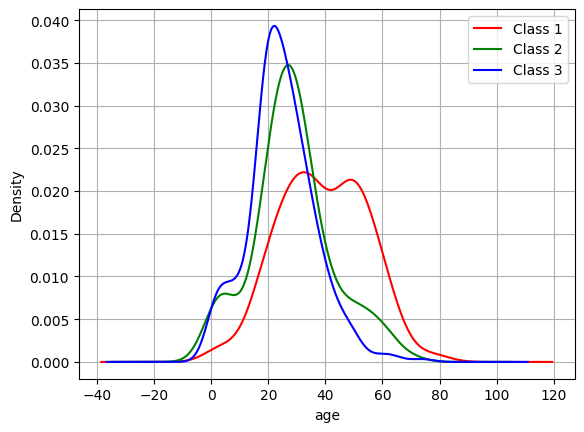

In [10]:
#menggambar KURVA untuk AGE
#before missing filing age with mean in each pclass

df[df.pclass==1].age.plot(kind='kde',color='r', label='Class 1')
df[df.pclass==2].age.plot(kind='kde',color='g', label='Class 2')
df[df.pclass==3].age.plot(kind='kde',color='b', label='Class 3')

plt.xlabel('age')
plt.legend(loc='best')
plt.grid()

In [11]:
#mengisi NULL value pada age

def filling_missing_age(dataset):
  for i in range(1,4):
    val_age=dataset[dataset['pclass']==i]['age'].mean()
    dataset.loc[(dataset['pclass']==i)&(dataset['age'].isnull()),'age']=val_age
  return dataset

df=filling_missing_age(df)

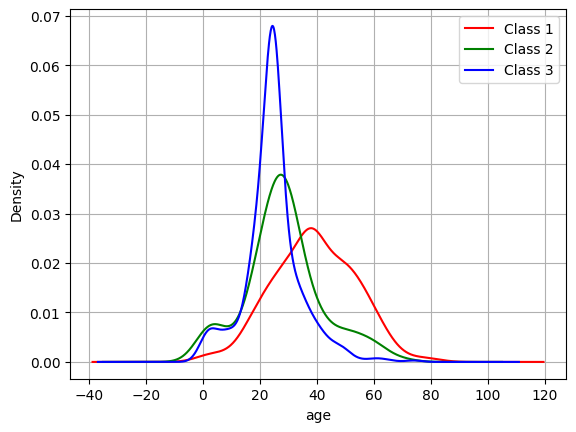

In [12]:
#menggambar KURVA untuk AGE
#after missing filing age with mean in each pclass

df[df.pclass==1].age.plot(kind='kde',color='r', label='Class 1')
df[df.pclass==2].age.plot(kind='kde',color='g', label='Class 2')
df[df.pclass==3].age.plot(kind='kde',color='b', label='Class 3')

plt.xlabel('age')
plt.legend(loc='best')
plt.grid()

In [13]:
#menghitung jumlah nilai-nilai yang hilang
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64